#  <center> Kaggle Challenge - 2
 <center>Arunaggiri Pandian Karunanidhi</center>
 <center>Srishti Todi</center>

In [178]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold

In [179]:
# read CSV file with low_memory=False
train_data = pd.read_csv('training_data.csv', low_memory=False)

While adding state feature during training the model performed well, so removing other categorical features excluding state

In [180]:
# Identify categorical columns (excluding "state")
categorical_columns = [col for col in train_data.columns if col != "state" and train_data[col].dtype == 'object']

# Drop categorical columns
train_data.drop(categorical_columns, axis=1, inplace=True)

In [181]:
train_data.drop('zip_code', axis=1, inplace=True)

In [182]:
train_data

,state,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,contribution_democratic_count,contribution_republican_count,politician_challenger_count,politician_count,...,candidacy_republican_ratio,contribution_democratic_count_ratio,contribution_republican_count_ratio,house_and_assembly_contribution_ratio,politician_challenger_ratio,politician_democratic_ratio,politician_incumbency_ratio,politician_open_pos_ratio,politician_republican_ratio,us_house_contribution_ratio
0,MT,1.0,4,4,0,6,6,0,0,4,...,0.0,1.0,0.0,0.000000,0.0,1.0,0.5,0.5,0.0,0.0
1,OH,0.5,2,2,0,2,2,0,1,2,...,0.0,1.0,0.0,0.216202,0.5,1.0,0.5,0.0,0.0,0.0
2,NJ,1.0,4,4,0,4,4,0,0,4,...,0.0,1.0,0.0,3.257082,0.0,1.0,1.0,0.0,0.0,0.0
3,MT,1.0,4,4,0,4,4,0,0,4,...,0.0,1.0,0.0,0.200000,0.0,1.0,0.5,0.5,0.0,0.0
4,FL,0.0,4,4,0,6,6,0,2,4,...,0.0,1.0,0.0,0.000000,0.5,1.0,0.0,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172843,CT,1.0,2,0,2,2,0,2,0,2,...,1.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0
172844,DE,1.0,2,2,0,4,4,0,2,2,...,0.0,1.0,0.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0
172845,NJ,1.0,2,0,2,2,0,2,0,2,...,1.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0
172846,LA,0.0,2,0,2,2,0,2,0,2,...,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0


In [183]:
# Find missing values in the dataframe
missing_values = train_data.isnull().sum()

# Print the number of missing values per column
print(missing_values)

state                                              0
winner_ratio                                       0
candidacy_count                                    0
candidacy_democratic_count                         0
candidacy_republican_count                         0
contribution_count                                 0
contribution_democratic_count                      0
contribution_republican_count                      0
politician_challenger_count                        0
politician_count                                   0
politician_democratic_count                        0
politician_incumbency_count                        0
politician_open_pos_count                          0
politician_republican_count                        0
contribution_democratic_sum_2010_usd               0
contribution_republican_sum_2010_usd               0
contribution_sum_2010_usd                          0
governor_contributions_sum_2010_usd                0
house_and_assembly_contributions_sum_2010_usd 

In [184]:
# Fill missing values with 0
train_data.fillna(0, inplace=True)

In [185]:
train_data.describe()

,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,contribution_democratic_count,contribution_republican_count,politician_challenger_count,politician_count,politician_democratic_count,...,candidacy_republican_ratio,contribution_democratic_count_ratio,contribution_republican_count_ratio,house_and_assembly_contribution_ratio,politician_challenger_ratio,politician_democratic_ratio,politician_incumbency_ratio,politician_open_pos_ratio,politician_republican_ratio,us_house_contribution_ratio
count,172848.000000,172848.000000,172848.000000,172848.000000,172848.000000,172848.000000,172848.000000,172848.000000,172848.000000,172848.000000,...,172848.000000,172848.000000,172848.000000,1.728480e+05,172848.000000,172848.000000,172848.000000,172848.000000,172848.000000,1.728480e+05
mean,0.594027,6.055546,3.270885,2.784661,9.664329,5.335486,4.328844,0.703607,5.037912,2.742670,...,0.444476,0.555765,0.444235,inf,0.160345,0.555662,0.390570,0.424520,0.444338,inf
std,0.410736,25.560675,14.016075,14.804989,92.532086,30.948342,81.499628,2.001822,15.138458,8.458277,...,0.468327,0.469502,0.469502,NaN,0.305183,0.467771,0.408596,0.413655,0.467771,NaN
min,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,-6.118411e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-6.448457e+00
25%,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.666667,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,...,0.181818,0.846154,0.153846,0.000000e+00,0.000000,0.800000,0.333333,0.333333,0.200000,0.000000e+00
75%,1.000000,4.000000,3.000000,2.000000,7.000000,4.000000,3.000000,1.000000,4.000000,2.000000,...,1.000000,1.000000,1.000000,4.896280e-01,0.200000,1.000000,0.800000,1.000000,1.000000,0.000000e+00
max,1.000000,2026.000000,1284.000000,1014.000000,31652.000000,3990.000000,31648.000000,140.000000,829.000000,543.000000,...,1.000000,1.000000,1.000000,inf,1.000000,1.000000,1.000000,1.000000,1.000000,inf


The train data has very large values so findig and removing those rows

In [186]:
import numpy as np

# Find columns with inf values
inf_columns = train_data.columns[train_data.isin([np.inf, -np.inf]).any()]

# Print the names of the columns with inf values
print(inf_columns)

Index(['house_and_assembly_contribution_ratio', 'us_house_contribution_ratio'], dtype='object')


In [187]:
# Find rows with inf values
inf_rows = train_data.isin([np.inf, -np.inf]).any(axis=1)

# Drop rows with inf values
train_data = train_data[~inf_rows]

In [188]:
train_data.describe()

,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,contribution_democratic_count,contribution_republican_count,politician_challenger_count,politician_count,politician_democratic_count,...,candidacy_republican_ratio,contribution_democratic_count_ratio,contribution_republican_count_ratio,house_and_assembly_contribution_ratio,politician_challenger_ratio,politician_democratic_ratio,politician_incumbency_ratio,politician_open_pos_ratio,politician_republican_ratio,us_house_contribution_ratio
count,172846.000000,172846.000000,172846.000000,172846.000000,172846.000000,172846.000000,172846.000000,172846.000000,172846.000000,172846.000000,...,172846.000000,172846.000000,172846.000000,172846.000000,172846.000000,172846.000000,172846.000000,172846.000000,172846.000000,172846.000000
mean,0.594029,6.055587,3.270923,2.784664,9.664406,5.335547,4.328859,0.703615,5.037941,2.742702,...,0.444469,0.555771,0.444229,0.257512,0.160346,0.555668,0.390570,0.424518,0.444332,0.117512
std,0.410738,25.560820,14.016152,14.805074,92.532618,30.948515,81.500099,2.001832,15.138544,8.458321,...,0.468326,0.469501,0.469501,0.402263,0.305184,0.467770,0.408598,0.413657,0.467770,0.428041
min,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,-6.118411,0.000000,0.000000,0.000000,0.000000,0.000000,-6.448457
25%,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.666667,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,...,0.181818,0.846154,0.153846,0.000000,0.000000,0.800000,0.333333,0.333333,0.200000,0.000000
75%,1.000000,4.000000,3.000000,2.000000,7.000000,4.000000,3.000000,1.000000,4.000000,2.000000,...,1.000000,1.000000,1.000000,0.489620,0.200000,1.000000,0.800000,1.000000,1.000000,0.000000
max,1.000000,2026.000000,1284.000000,1014.000000,31652.000000,3990.000000,31648.000000,140.000000,829.000000,543.000000,...,1.000000,1.000000,1.000000,30.388715,1.000000,1.000000,1.000000,1.000000,1.000000,93.603744


In [189]:
import numpy as np

# Find columns with inf values
inf_columns = train_data.columns[train_data.isin([np.inf, -np.inf]).any()]

# Print the names of the columns with inf values
print(inf_columns)

Index([], dtype='object')


In [190]:
# Find missing values in the dataframe
missing_values = train_data.isnull().sum()

# Print the number of missing values per column
print(missing_values)

state                                            0
winner_ratio                                     0
candidacy_count                                  0
candidacy_democratic_count                       0
candidacy_republican_count                       0
contribution_count                               0
contribution_democratic_count                    0
contribution_republican_count                    0
politician_challenger_count                      0
politician_count                                 0
politician_democratic_count                      0
politician_incumbency_count                      0
politician_open_pos_count                        0
politician_republican_count                      0
contribution_democratic_sum_2010_usd             0
contribution_republican_sum_2010_usd             0
contribution_sum_2010_usd                        0
governor_contributions_sum_2010_usd              0
house_and_assembly_contributions_sum_2010_usd    0
senate_contributions_sum_2010_u

Checking correlation

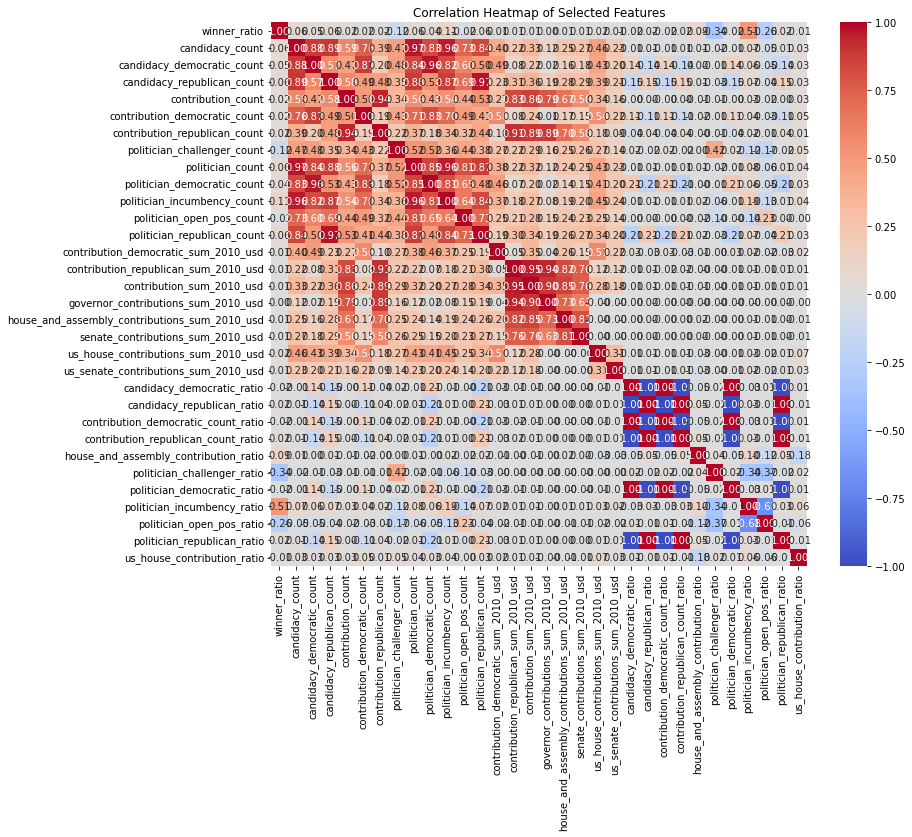

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

data_selected = train_data

# Calculate the correlation matrix
correlation_matrix = data_selected.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

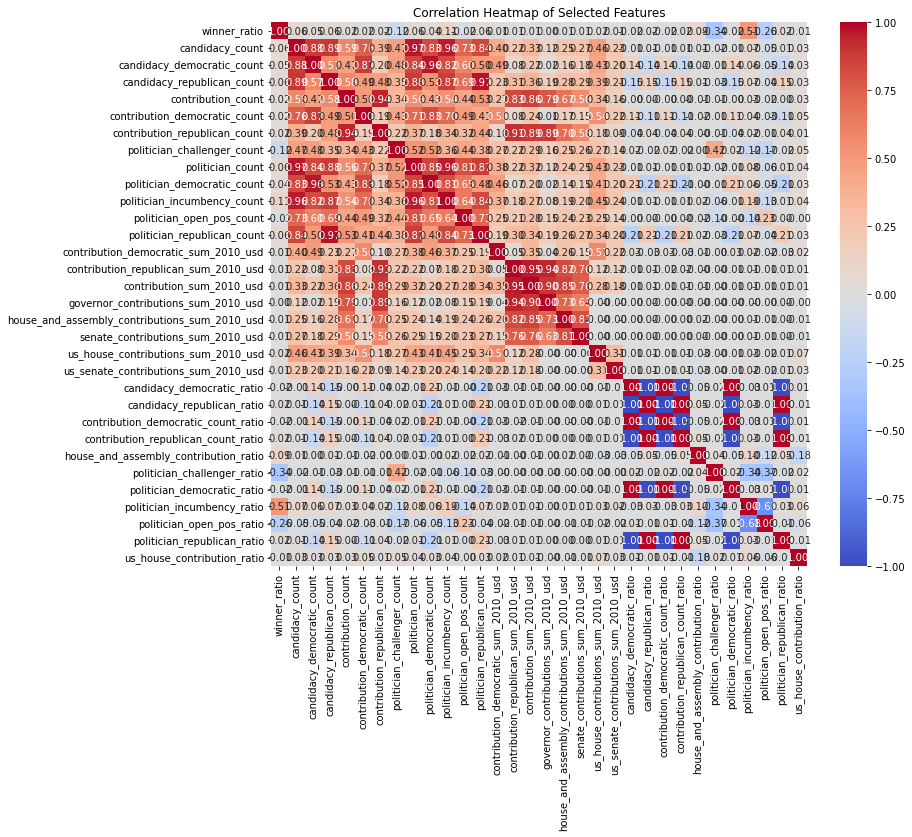

Selected Features: ['winner_ratio', 'candidacy_count', 'candidacy_democratic_count', 'candidacy_republican_count', 'contribution_count', 'contribution_democratic_count', 'contribution_republican_count', 'politician_challenger_count', 'politician_count', 'politician_democratic_count', 'politician_incumbency_count', 'politician_open_pos_count', 'politician_republican_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd', 'governor_contributions_sum_2010_usd', 'house_and_assembly_contributions_sum_2010_usd', 'senate_contributions_sum_2010_usd', 'us_house_contributions_sum_2010_usd', 'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politician_democratic_ratio', 'politician_incumbency_ratio', 'politician_open_pos_ratio', 'politicia

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

data_selected = train_data

# Calculate the correlation matrix
correlation_matrix = data_selected.corr()

# Get the selected features
selected_features = correlation_matrix.columns.tolist()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

print("Selected Features:", selected_features)

Tried to remove features that are highly correlated and train with those features to avoid multicollinearity, but it did not quite work out! So commenting it out below

In [193]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# data_selected = train_data

# # Calculate the correlation matrix
# correlation_matrix = data_selected.corr()

# def filter_highly_correlated(correlation_matrix, threshold=0.95):
#     # Get the names of the columns
#     cols = correlation_matrix.columns
#     # Create a boolean mask with the threshold
#     mask = abs(correlation_matrix) > threshold
#     # Set the diagonal elements to False
#     mask.values[[np.arange(len(cols))]*2] = False
#     # Get the remaining columns
#     remaining_columns = cols[~mask.any()].tolist()
#     return remaining_columns

# selected_features = filter_highly_correlated(correlation_matrix, threshold=0.9)
# filtered_correlation_matrix = correlation_matrix.loc[selected_features, selected_features]

# # Plot the heatmap
# plt.figure(figsize=(16, 14))
# sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap of Selected Features')
# plt.show()

# print("Selected features:", selected_features)

In [194]:
selected_features = selected_features + ["state"]

In [195]:
selected_features

['winner_ratio',
 'candidacy_count',
 'candidacy_democratic_count',
 'candidacy_republican_count',
 'contribution_count',
 'contribution_democratic_count',
 'contribution_republican_count',
 'politician_challenger_count',
 'politician_count',
 'politician_democratic_count',
 'politician_incumbency_count',
 'politician_open_pos_count',
 'politician_republican_count',
 'contribution_democratic_sum_2010_usd',
 'contribution_republican_sum_2010_usd',
 'contribution_sum_2010_usd',
 'governor_contributions_sum_2010_usd',
 'house_and_assembly_contributions_sum_2010_usd',
 'senate_contributions_sum_2010_usd',
 'us_house_contributions_sum_2010_usd',
 'us_senate_contributions_sum_2010_usd',
 'candidacy_democratic_ratio',
 'candidacy_republican_ratio',
 'contribution_democratic_count_ratio',
 'contribution_republican_count_ratio',
 'house_and_assembly_contribution_ratio',
 'politician_challenger_ratio',
 'politician_democratic_ratio',
 'politician_incumbency_ratio',
 'politician_open_pos_ratio',


In [196]:
train_data = train_data[selected_features]

Performing one hot encoding on categorical feature - "State", tried Ordinal Encoding, label encoding too, but it did not work out!

In [197]:
from sklearn.preprocessing import OneHotEncoder

# Identify the categorical columns (including "state")
categorical_columns = [col for col in train_data.columns if train_data[col].dtype == 'object']

# Perform one-hot encoding on the "state" column
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
state_one_hot = encoder.fit_transform(train_data[["state"]])

# Create a new dataframe for the one-hot encoded "state" feature
state_one_hot_df = pd.DataFrame(state_one_hot, columns=encoder.get_feature_names_out(input_features=["state"]))

# Drop the original "state" column from the train_data dataframe
train_data.drop("state", axis=1, inplace=True)

# Add the one-hot encoded "state" feature back into the train_data dataframe
train_data = pd.concat([train_data, state_one_hot_df], axis=1)

C:\Users\Arunaggiri Pandian\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_23464\4034450734.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop("state", axis=1, inplace=True)


In [198]:
train_data

,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,contribution_democratic_count,contribution_republican_count,politician_challenger_count,politician_count,politician_democratic_count,...,state_SC,state_SD,state_TN,state_TX,state_US,state_UT,state_VA,state_VT,state_WA,state_WY
0,1.0,4.0,4.0,0.0,6.0,6.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,4.0,4.0,0.0,6.0,6.0,0.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172845,1.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172846,0.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172847,0.0,4.0,0.0,4.0,4.0,0.0,4.0,2.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [199]:
# Identify columns with missing values (if any)
missing_columns = train_data.columns[train_data.isna().any()].tolist()

# Impute missing values with 0
train_data[missing_columns] = train_data[missing_columns].fillna(0)

In [200]:
X = train_data.drop('winner_ratio', axis=1)
y = train_data['winner_ratio']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Commenting out all the other models, except the best 2 models on the train set i.e., Light BGM and CatBoost

In [201]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler

# model_name = "Linear Regression"
# model_lr = LinearRegression()

# # Scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# # Fit the model on the whole training data and evaluate on the validation data
# model_lr.fit(X_train_scaled, y_train)
# y_pred = model_lr.predict(X_val_scaled)
# rmse = mean_squared_error(y_val, y_pred, squared=False)

# print(f"{model_name} - Validation RMSE: {rmse}")

In [202]:
# model_name = "Decision Tree"
# model_dt = DecisionTreeRegressor(random_state=42)

# # Fit the model on the whole training data and evaluate on the validation data
# model_dt.fit(X_train_scaled, y_train)
# y_pred = model_dt.predict(X_val_scaled)
# rmse = mean_squared_error(y_val, y_pred, squared=False)

# print(f"{model_name} - Validation RMSE: {rmse}")

In [203]:
# model_name = "Random Forest"
# model_rf = RandomForestRegressor(random_state=42)

# # Fit the model on the training data and evaluate on the validation data
# model_rf.fit(X_train, y_train)
# y_pred = model_rf.predict(X_val)
# rmse = mean_squared_error(y_val, y_pred, squared=False)

# print(f"{model_name} - Validation RMSE: {rmse}")

In [204]:
# model_name = "XGBoost"
# model_xgb = XGBRegressor(random_state=42)

# # Fit the model on the whole training data and evaluate on the validation data
# model_xgb.fit(X_train, y_train)
# y_pred = model_xgb.predict(X_val)
# rmse = mean_squared_error(y_val, y_pred, squared=False)

# print(f"{model_name} - Validation RMSE: {rmse}")

In [205]:
from lightgbm import LGBMRegressor

model_name = "LightGBM"
model_lgbm = LGBMRegressor(random_state=42)

model_lgbm.fit(X_train, y_train)
y_pred = model_lgbm.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)

print(f"{model_name} - Validation RMSE: {rmse}")

LightGBM - Validation RMSE: 0.31125554231020175


In [206]:
from catboost import CatBoostRegressor

model_name = "CatBoost"
model_cat = CatBoostRegressor(random_state=42, verbose=0)

model_cat.fit(X_train, y_train)
y_pred = model_cat.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)

print(f"{model_name} - Validation RMSE: {rmse}")

CatBoost - Validation RMSE: 0.30527777287684066


#### CatBoost  RMSE Value: 0.30527777287684066

Doing the same preprocessing on the test set and predicting the winner_ratio

## Test

In [207]:
test_data = pd.read_csv('test_data.csv')
# test_data = test_data[selected_features]
# test_data = test_data.drop('winner_ratio', axis=1)

In [208]:
# Identify categorical columns (excluding "state")
categorical_columns = [col for col in test_data.columns if col != "state" and test_data[col].dtype == 'object']

# Drop categorical columns
test_data.drop(categorical_columns, axis=1, inplace=True)

In [209]:
categorical_columns

['general_sector', 'city', 'specific_sector', 'contributor_type']

In [210]:
# Fill missing values with 0
test_data.fillna(0, inplace=True)

In [211]:
# Find rows with inf values
inf_rows = test_data.isin([np.inf, -np.inf]).any(axis=1)

# Drop rows with inf values
test_data = test_data[~inf_rows]

In [212]:
test_data = test_data[selected_features]

In [213]:
test_data.describe()

,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,contribution_democratic_count,contribution_republican_count,politician_challenger_count,politician_count,politician_democratic_count,...,candidacy_republican_ratio,contribution_democratic_count_ratio,contribution_republican_count_ratio,house_and_assembly_contribution_ratio,politician_challenger_ratio,politician_democratic_ratio,politician_incumbency_ratio,politician_open_pos_ratio,politician_republican_ratio,us_house_contribution_ratio
count,115232.0,115232.000000,115232.000000,115232.000000,115232.000000,115232.000000,115232.000000,115232.000000,115232.000000,115232.000000,...,115232.000000,115232.000000,115232.000000,115232.000000,115232.000000,115232.000000,115232.000000,115232.000000,115232.000000,115232.000000
mean,0.0,6.137566,3.336165,2.801401,9.908402,5.607878,4.300524,0.725502,5.085245,2.783584,...,0.444439,0.555795,0.444205,0.258281,0.160320,0.555733,0.390651,0.425127,0.444267,0.114511
std,0.0,31.573718,16.112898,18.335290,113.077850,55.479895,62.121627,4.793471,19.176516,10.058433,...,0.468599,0.469744,0.469744,0.409955,0.305135,0.468045,0.408421,0.414063,0.468045,0.470894
min,0.0,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,-24.851579,0.000000,0.000000,0.000000,0.000000,0.000000,-102.149394
25%,0.0,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,...,0.166667,0.857143,0.142857,0.000000,0.000000,0.800000,0.333333,0.333333,0.200000,0.000000
75%,0.0,4.000000,3.000000,2.000000,7.000000,4.000000,3.000000,1.000000,4.000000,2.000000,...,1.000000,1.000000,1.000000,0.496855,0.200000,1.000000,0.800000,1.000000,1.000000,0.000000
max,0.0,5027.000000,2133.000000,2894.000000,32827.000000,14585.000000,18242.000000,1424.000000,3521.000000,1506.000000,...,1.000000,1.000000,1.000000,30.923821,1.000000,1.000000,1.000000,1.000000,1.000000,31.173593


In [215]:
from sklearn.preprocessing import OneHotEncoder

# Identify the categorical columns (including "state")
categorical_columns = [col for col in test_data.columns if test_data[col].dtype == 'object']

# Perform one-hot encoding on the "state" column
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
state_one_hot = encoder.fit_transform(test_data[["state"]])

# Create a new dataframe for the one-hot encoded "state" feature
state_one_hot_df = pd.DataFrame(state_one_hot, columns=encoder.get_feature_names_out(input_features=["state"]))

# Drop the original "state" column from the test_data dataframe
test_data.drop("state", axis=1, inplace=True)

# Add the one-hot encoded "state" feature back into the test_data dataframe
test_data = pd.concat([test_data, state_one_hot_df], axis=1)

C:\Users\Arunaggiri Pandian\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [216]:
# test_data = test_data.drop(test_data.columns[0], axis=1)
test_data

,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,contribution_democratic_count,contribution_republican_count,politician_challenger_count,politician_count,politician_democratic_count,...,state_SC,state_SD,state_TN,state_TX,state_US,state_UT,state_VA,state_VT,state_WA,state_WY
0,0.0,6,6,0,10,10,0,0,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2,0,2,2,0,2,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2,0,2,2,0,2,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2,0,2,6,0,6,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2,0,2,2,0,2,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115227,0.0,2,2,0,2,2,0,0,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
115228,0.0,2,0,2,2,0,2,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115229,0.0,2,0,2,2,0,2,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115230,0.0,135,95,40,152,105,47,4,99,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
# Preprocess the test_data and make predictions
X_test_selected = test_data

## Predictions

In [218]:
y_test_pred = model_cat.predict(X_test_selected)

# Create a submission DataFrame
submission_df = pd.DataFrame({"Index": test_data.index, "winner_ratio": y_test_pred})

In [219]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv("submission-april_23_cat.csv", index=False)
print("Success csv file created !")

Success csv file created !
